In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('customer_booking.csv', date_parser= ['flight_day'], encoding='latin-1')

In [17]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [21]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [22]:
data.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [23]:
mapping = { 'Sun':1,
            'Mon':2,
            'Tue':3,
            'Wed':4,
            'Thu':5,
            'Fri':6,
            'Sat':7
            }

In [25]:
flight_dayy = data['flight_day'].map(mapping)

In [27]:
data.drop('flight_day', axis=1, inplace=True)

In [28]:
data['Flight_day'] = flight_dayy

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   route                  50000 non-null  object 
 7   booking_origin         50000 non-null  object 
 8   wants_extra_baggage    50000 non-null  int64  
 9   wants_preferred_seat   50000 non-null  int64  
 10  wants_in_flight_meals  50000 non-null  int64  
 11  flight_duration        50000 non-null  float64
 12  booking_complete       50000 non-null  int64  
 13  Flight_day             50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [39]:
for label, content in data.items():
    if pd.api.types.is_object_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50000 non-null  int64   
 1   sales_channel          50000 non-null  category
 2   trip_type              50000 non-null  category
 3   purchase_lead          50000 non-null  int64   
 4   length_of_stay         50000 non-null  int64   
 5   flight_hour            50000 non-null  int64   
 6   route                  50000 non-null  category
 7   booking_origin         50000 non-null  category
 8   wants_extra_baggage    50000 non-null  int64   
 9   wants_preferred_seat   50000 non-null  int64   
 10  wants_in_flight_meals  50000 non-null  int64   
 11  flight_duration        50000 non-null  float64 
 12  booking_complete       50000 non-null  int64   
 13  Flight_day             50000 non-null  int64   
dtypes: category(4), float64(1), int64(9)
m

In [42]:
for label, content in data.items():
    if pd.api.types.is_categorical_dtype(content):
        data[label] = pd.Categorical(content).codes+1

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int8   
 2   trip_type              50000 non-null  int8   
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   route                  50000 non-null  int16  
 7   booking_origin         50000 non-null  int8   
 8   wants_extra_baggage    50000 non-null  int64  
 9   wants_preferred_seat   50000 non-null  int64  
 10  wants_in_flight_meals  50000 non-null  int64  
 11  flight_duration        50000 non-null  float64
 12  booking_complete       50000 non-null  int64  
 13  Flight_day             50000 non-null  int64  
dtypes: float64(1), int16(1), int64(9), int8(3)
memory usag

In [44]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Flight_day
0,2,1,3,262,19,7,1,62,1,0,0,5.52,0,7
1,1,1,3,112,20,3,1,62,0,0,0,5.52,0,7
2,2,1,3,243,22,17,1,37,1,1,0,5.52,0,4
3,1,1,3,96,31,4,1,62,0,0,1,5.52,0,7
4,2,1,3,68,22,15,1,37,1,0,1,5.52,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,3,27,6,9,721,5,1,0,1,5.62,0,7
49996,1,1,3,111,6,4,721,5,0,0,0,5.62,0,1
49997,1,1,3,24,6,22,721,5,0,0,1,5.62,0,7
49998,1,1,3,15,6,11,721,5,1,0,1,5.62,0,2


In [45]:
x = data.drop('booking_complete', axis=1)
y = data.booking_complete

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8)

In [47]:
len(x_train)

40000

In [54]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
clf = RandomForestClassifier()

In [50]:
model = clf.fit(x_train,y_train)

In [53]:
model.score(x_test, y_test)

0.8488

In [59]:
y_preds = model.predict(x_test)

In [65]:
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import precision_score, f1_score, accuracy_score

In [68]:
precision = precision_score(y_test, y_preds)
precision

0.5160256410256411

In [88]:
accuracy = (accuracy_score(y_test, y_preds))
accuracy 

0.8488

In [81]:
f1 = (f1_score(y_test, y_preds))
f1

0.17557251908396948

In [84]:
df['precision'] = precision
df['accuracy'] = accuracy

In [91]:
data = {'precision': precision, 'f1':f1, 'accuracy':accuracy}

In [94]:
df = pd.DataFrame(data, index=range(1))

In [95]:
df

,precision,f1,accuracy
0,0.516026,0.175573,0.8488


In [96]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test, y_preds)

array([[8327,  151],
       [1361,  161]], dtype=int64)

In [100]:
feat_importance = model.feature_importances_

In [101]:
feature = pd.DataFrame({'feature':x_train.columns, 'Importance':feat_importance})

In [104]:
feature = feature.sort_values(by='Importance')

In [112]:
feature

,feature,Importance
2,trip_type,0.001714
1,sales_channel,0.011537
9,wants_preferred_seat,0.015761
8,wants_extra_baggage,0.016483
10,wants_in_flight_meals,0.021606
0,num_passengers,0.049124
11,flight_duration,0.072573
12,Flight_day,0.091829
7,booking_origin,0.108322
4,length_of_stay,0.125024


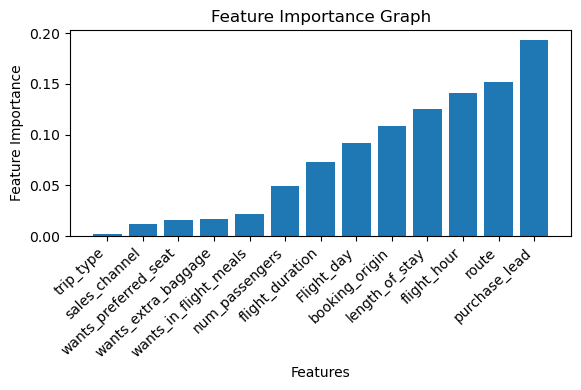

In [127]:
plt.figure(figsize=(6,4))
plt.bar(feature.feature, feature.Importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Graph')
plt.xticks(rotation=43, ha='right')
plt.tight_layout()
plt.show()

#feature.plot(kind='bar', xlabel=feature.feature, figsize=(10,10));